# Clustering with two features

### Objective
* we'll build a model to segment those households into distinct clusters, and examine the differences between those clusters.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import Data

In [5]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    mask=df['TURNFEAR']==1
    df[mask]
    return df

In [6]:
df= wrangle("scfp2019excel.zip")
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28885 entries, 0 to 28884
Columns: 351 entries, YY1 to NINCQRTCAT
dtypes: float64(74), int64(277)
memory usage: 77.4 MB


## Explore 
* We work of some features in TURFEAR LIKE real estate and debt so we schow the relationship between real estate and debt in the TURNFEAR

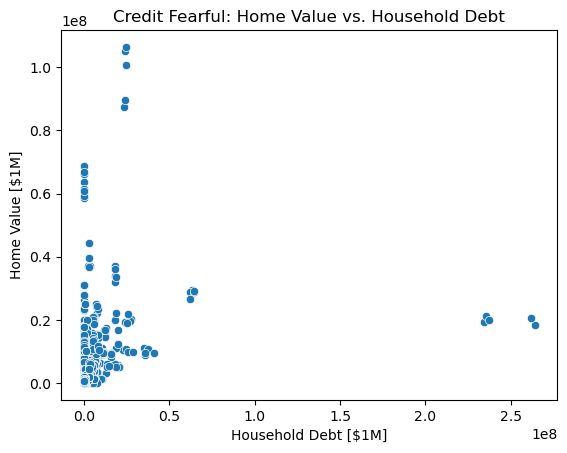

In [9]:
sns.scatterplot(
    x="DEBT", 
    y= 'HOUSES',
    data=df
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

## Split 
* In unsupervised learning we don't need the vector target

In [11]:
X=df[["DEBT", "HOUSES"]]
print(X.shape)

(28885, 2)


In [12]:
X.head()

,DEBT,HOUSES
0,0.0,1100000.0
1,0.0,1100000.0
2,0.0,1100000.0
3,0.0,1100000.0
4,0.0,1100000.0


## Build a model
** we work with Kmeans model in this project 

In [14]:
model=KMeans(n_clusters=3, random_state=42)

### Fit a model

In [16]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

### Extract the Labels

In [18]:
labels=model.labels_
labels[:5]

array([0, 0, 0, 0, 0])

* We schow our labels 

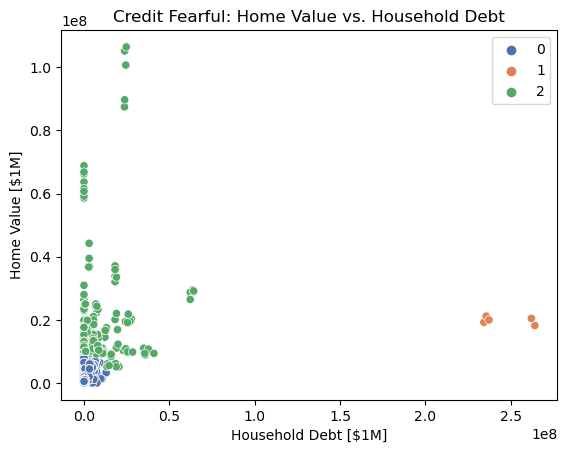

In [24]:
sns.scatterplot(
    x="DEBT",
    y="HOUSES",
    data=df,
    hue= labels, 
    palette="deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

### The centroids

In [29]:
centroids=model.cluster_centers_
centroids

array([[1.86481528e+05, 5.20641584e+05],
       [2.46598000e+08, 1.98020000e+07],
       [5.80897115e+06, 1.67500840e+07]])

* schow the centroids and all data in the some picture

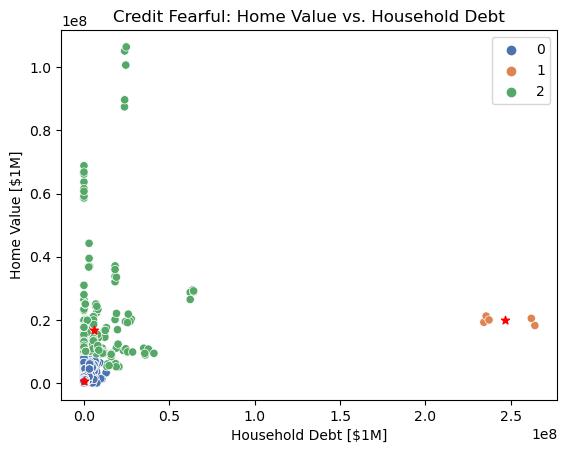

In [36]:
sns.scatterplot(
    x="DEBT",
    y="HOUSES",
    data=df,
    hue= labels, 
    palette="deep"
)
#plot centroids
plt.scatter(
    x=centroids[:, 0] ,
    y=centroids[:, 1] , color="red",
    marker="*"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");